# Applying the use of RNN 

We are starting off with importing the needed libraries:

In [115]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Importing Dataset, we are importing it from a csv file, which the explains the need of the use of read_csv of pandas.

In [116]:
imdb = pd.read_csv("datasets/IMDB Dataset.csv")

Dataset dimension

In [117]:
print(imdb.shape)

(50000, 2)


Check for null values in dataframe

In [118]:
print(imdb.isnull().values.any())

False


Print the 5 first lines of our dataset

In [119]:
print(imdb.iloc[:5])

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [120]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Using the countplot method from seaborn library

In [121]:
import seaborn as sns

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__(self)
 |  
 |  set(self, *, adjustable=<UNSET>, agg_filter=<UNSET>, alpha=<UNSET>, anchor=<UNSET>, animated=<UNSET>, aspect=<UNSET>, autoscale_on=<UNSET>, autoscalex_on=<UNSET>, autoscaley_on=<UNSET>, axes_locator=<UNSET>, axisbelow=<UNSET>, box_aspect=<UNSET>, clip_box=<UNSET>, clip_on=<UNSET>, clip_path=<UNSET>, facecolor=<UNSET>, frame_on=<UNSET>, gid=<UNSET>, in_layout=<UNSET>, label=<UNSET>, navigate=<UNSET>, path_effects=<UNSET>, picker=<UNSET>, position=<UNSET>, prop_cycle=<UNSET>, rasterization_zorder=<UNSET>, rasterized=<UNSET>, sketch_params=<UNSET>, snap=<UNSET>, 

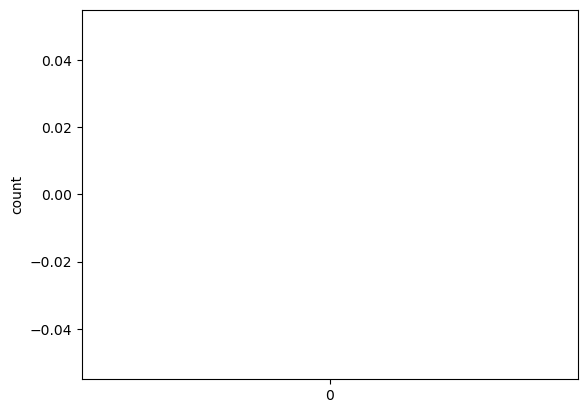

In [122]:
help(sns.countplot())

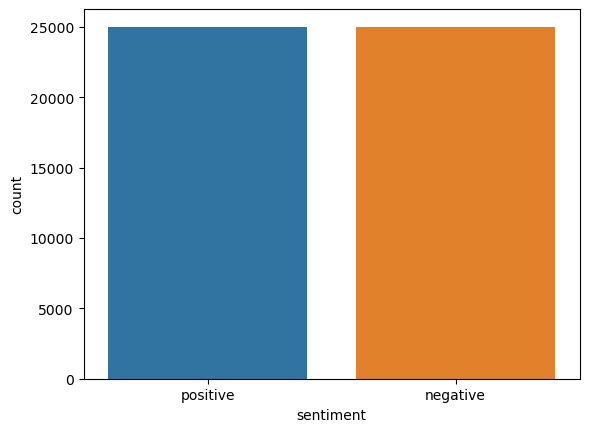

In [123]:
import matplotlib.pyplot as plt
sns.countplot(x='sentiment',data= imdb)
plt.show()

Looks quite Balanced!

In [124]:
print(imdb["review"][3])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


The review is not formatted properly. there are html tags.

In [125]:
def preprocess_text(sen):
# Removing html tags
    sentence = remove_tags(sen)
# Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
# Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
# Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

These functions are mean to both process and edit the text to the right format. it takes into parameters the text.
removes: html tags / the existence of characters/ multiple spaces/ puncutation and numbers.

This will work the purpose of  preprocessing text data by removing any unwanted HTML tags, punctuations, and numbers, and preparing the text data for further analysis or machine learning tasks.



In [200]:
X= []
elements = list(imdb["review"])
for el in elements:
    X.append(preprocess_text(el))

In [201]:
print(X[3])

Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


The text reviews got imported in an intermediate list elements, then got preprocessed and affected to the X list. now we have a coherent text

In [202]:
y = imdb['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Let's now move to training:

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Embedding Layer

In [16]:
tokenizer = Tokenizer(num_words=5000)
#Added code to convert each element in X_train and X_test to strings 
#in order to make the rest of the methods on code work

tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

This code is mainly for text preprocessing and sequence generation 
the tokenizer will build a vocaulary of 5000 of the most frequent words in our dataset

We will also be updating the tokenizer internal vocabulary based on words from training dataset X_train

In [17]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("datasets/glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:],dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [19]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### Simple Classification with Neural Network

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length = maxlen , trainable=False))
model.add(Flatten())
model.add(Dense(1, activation = "sigmoid"))

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics =['acc'])


In [22]:
history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.6078 - acc: 0.6678 - val_loss: 0.5424 - val_acc: 0.7286
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4950 - acc: 0.7625 - val_loss: 0.5477 - val_acc: 0.7215
Epoch 3/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4619 - acc: 0.7837 - val_loss: 0.5209 - val_acc: 0.7442
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4415 - acc: 0.7956 - val_loss: 0.5190 - val_acc: 0.7505
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4187 - acc: 0.8099 - val_loss: 0.5389 - val_acc: 0.7427
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4088 - acc: 0.8160 - val_loss: 0.5279 - val_acc: 0.7451


Evaluating the model

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.5329 - acc: 0.7449
Test Score: 0.5328667163848877
Test Accuracy: 0.7448999881744385


Plotting Loss and Accuracy for both training set and test set

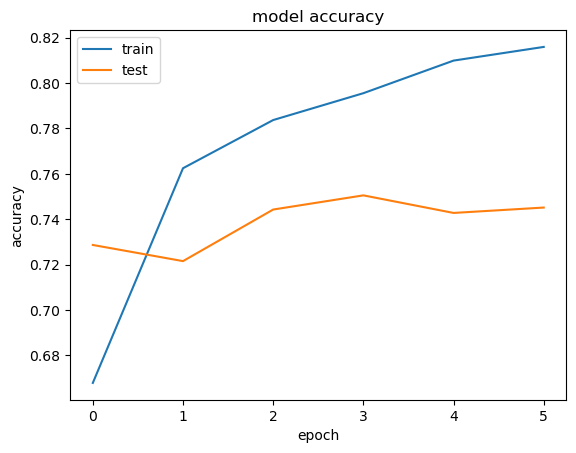

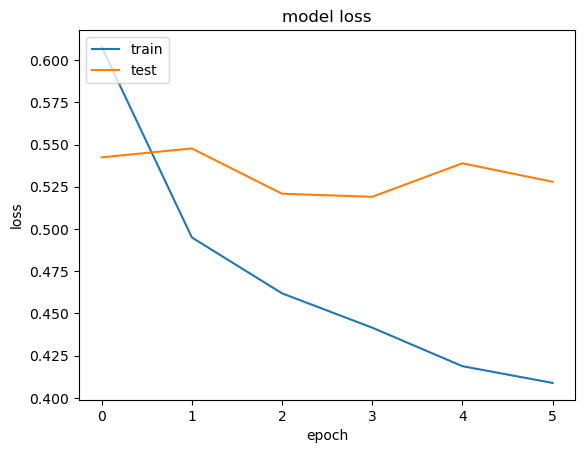

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

the model is overfitting in our case

### Classification with convolutional neural network

In [25]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(Conv1D(filters=128, kernel_size=5,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [27]:
history = model.fit(X_train, y_train, epochs=6,batch_size=128,verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 7s 26ms/step - loss: 0.5033 - acc: 0.7490 - val_loss: 0.4163 - val_acc: 0.8052
Epoch 2/6
250/250 [==============================] - 7s 27ms/step - loss: 0.3707 - acc: 0.8353 - val_loss: 0.3907 - val_acc: 0.8204
Epoch 3/6
250/250 [==============================] - 8s 31ms/step - loss: 0.3188 - acc: 0.8646 - val_loss: 0.3479 - val_acc: 0.8450
Epoch 4/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2798 - acc: 0.8873 - val_loss: 0.3523 - val_acc: 0.8429
Epoch 5/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2428 - acc: 0.9075 - val_loss: 0.3601 - val_acc: 0.8380
Epoch 6/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2135 - acc: 0.9223 - val_loss: 0.3678 - val_acc: 0.8355


In [28]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3743 - acc: 0.8349
Test Score: 0.37425562739372253
Test Accuracy: 0.8349000215530396


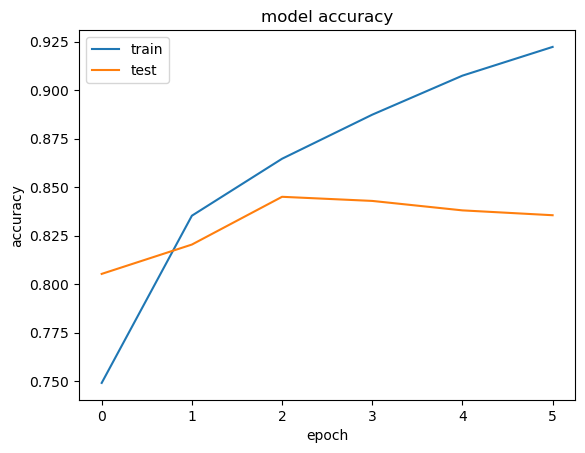

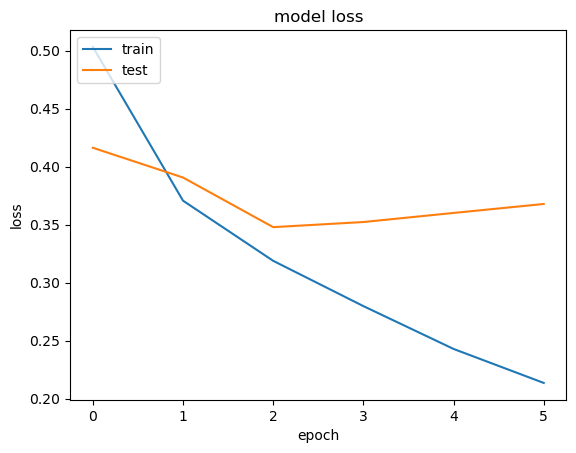

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Classification with Reccurent Neural Network LSTM

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(LSTM(128))
model.add(Dense(1,activation="sigmoid"))

In [31]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [32]:
history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 35s 136ms/step - loss: 0.5656 - acc: 0.7045 - val_loss: 0.4727 - val_acc: 0.7778
Epoch 2/6
250/250 [==============================] - 32s 127ms/step - loss: 0.4426 - acc: 0.7959 - val_loss: 0.4018 - val_acc: 0.8152
Epoch 3/6
250/250 [==============================] - 33s 134ms/step - loss: 0.3907 - acc: 0.8233 - val_loss: 0.3806 - val_acc: 0.8295
Epoch 4/6
250/250 [==============================] - 35s 142ms/step - loss: 0.3618 - acc: 0.8413 - val_loss: 0.3590 - val_acc: 0.8407
Epoch 5/6
250/250 [==============================] - 38s 152ms/step - loss: 0.3387 - acc: 0.8514 - val_loss: 0.3510 - val_acc: 0.8514
Epoch 6/6
250/250 [==============================] - 37s 148ms/step - loss: 0.3189 - acc: 0.8608 - val_loss: 0.3482 - val_acc: 0.8482


In [33]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.3417 - acc: 0.8512
Test Score: 0.3417128026485443
Test Accuracy: 0.8511999845504761


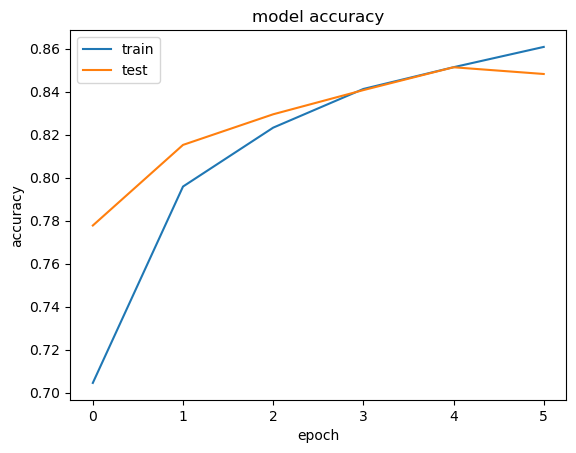

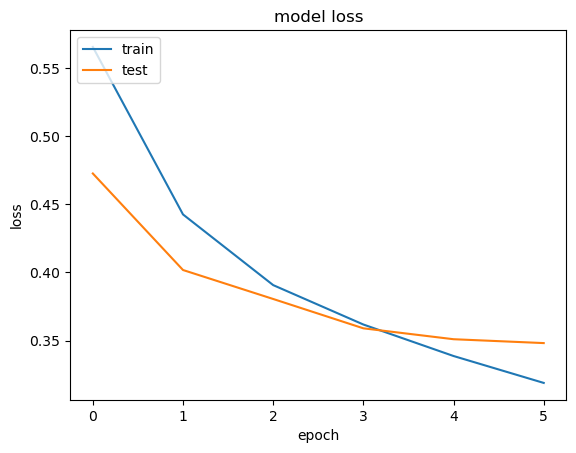

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [35]:
print(X[3])

Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


In [36]:
y[3]

0

In [37]:
predicted = tokenizer.texts_to_sequences([X[20]])
text = pad_sequences(predicted,padding='post',maxlen=maxlen)
model.predict(text)

1/1 [==============================] - 0s 334ms/step


array([[0.4755244]], dtype=float32)

The prediction is accurate (less than 0.5)

Let's try with a new text: 

In [42]:
exp="I like this movie very much"
predicted = tokenizer.texts_to_sequences([exp])
text = pad_sequences(predicted,padding='post',maxlen=maxlen)
model.predict(text)

1/1 [==============================] - 0s 229ms/step


array([[0.81393886]], dtype=float32)

The prediction is once again accurate: positive feedback ( greater than 0.5)

# Homework


### Classification with GRU

In [43]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(GRU(128))
model.add(Dense(1,activation="sigmoid"))

In [44]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [45]:
history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 30s 116ms/step - loss: 0.5352 - acc: 0.7183 - val_loss: 0.4056 - val_acc: 0.8196
Epoch 2/6
250/250 [==============================] - 29s 116ms/step - loss: 0.3917 - acc: 0.8214 - val_loss: 0.3695 - val_acc: 0.8364
Epoch 3/6
250/250 [==============================] - 26s 105ms/step - loss: 0.3574 - acc: 0.8422 - val_loss: 0.3621 - val_acc: 0.8371
Epoch 4/6
250/250 [==============================] - 28s 114ms/step - loss: 0.3358 - acc: 0.8527 - val_loss: 0.3524 - val_acc: 0.8435
Epoch 5/6
250/250 [==============================] - 28s 113ms/step - loss: 0.3136 - acc: 0.8642 - val_loss: 0.3331 - val_acc: 0.8555
Epoch 6/6
250/250 [==============================] - 28s 110ms/step - loss: 0.2964 - acc: 0.8731 - val_loss: 0.3242 - val_acc: 0.8590


In [46]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 4s 14ms/step - loss: 0.3145 - acc: 0.8614
Test Score: 0.31450918316841125
Test Accuracy: 0.8614000082015991


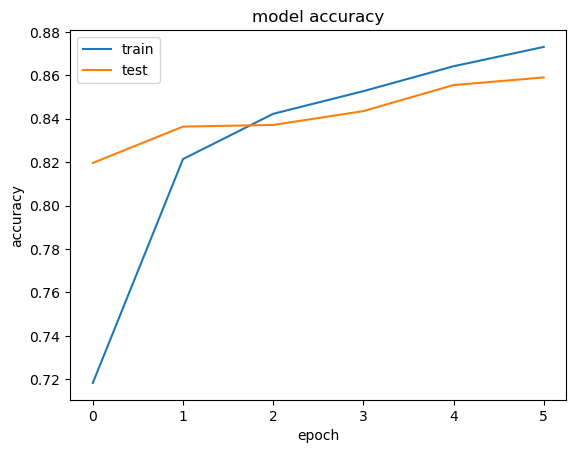

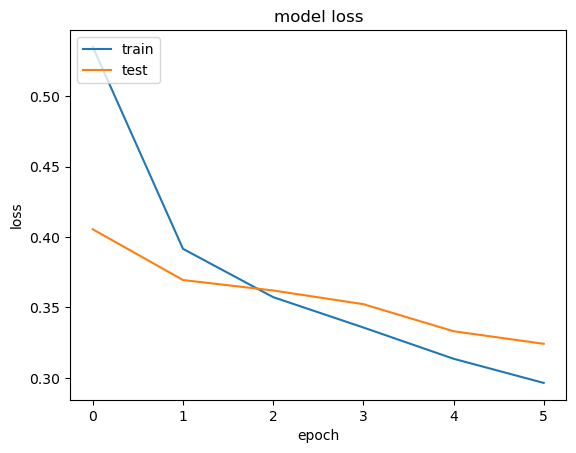

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Classification with RNN + CNN

In [48]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(SimpleRNN(128,return_sequences=True))
model.add(Conv1D(filters=128, kernel_size=5,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation="sigmoid"))

In [49]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [50]:
history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 20s 78ms/step - loss: 0.5059 - acc: 0.7437 - val_loss: 0.3991 - val_acc: 0.8192
Epoch 2/6
250/250 [==============================] - 19s 78ms/step - loss: 0.3746 - acc: 0.8333 - val_loss: 0.4039 - val_acc: 0.8105
Epoch 3/6
250/250 [==============================] - 19s 77ms/step - loss: 0.3250 - acc: 0.8586 - val_loss: 0.3738 - val_acc: 0.8347
Epoch 4/6
250/250 [==============================] - 20s 78ms/step - loss: 0.2826 - acc: 0.8828 - val_loss: 0.3598 - val_acc: 0.8397
Epoch 5/6
250/250 [==============================] - 20s 78ms/step - loss: 0.2437 - acc: 0.9047 - val_loss: 0.3790 - val_acc: 0.8367
Epoch 6/6
250/250 [==============================] - 19s 74ms/step - loss: 0.2013 - acc: 0.9255 - val_loss: 0.3702 - val_acc: 0.8430


In [51]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.3615 - acc: 0.8437
Test Score: 0.36150145530700684
Test Accuracy: 0.8436999917030334


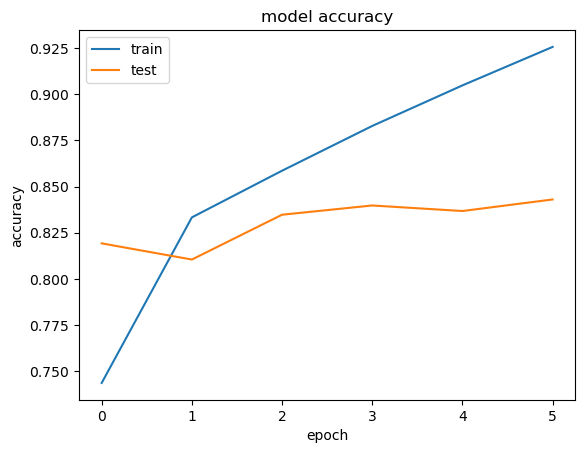

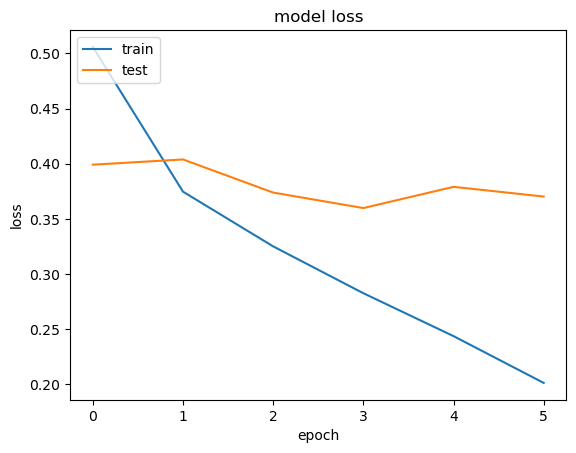

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Let's memorize the accuracies in a list for later.


In [99]:
GloveAcc=["0.8511999845504761", "0.8614000082015991"," 0.8436999917030334"]

## Word2vec 

### as it was mentioned in the howework we will be comaring three pre-trained models with 3 different Classifiers.

unlike the Glove downloaded locally pre trained model we will be loading our models online through the "gensim downloader" library. In word 2 vec and after a good research, we will be using the pre trained "Word2vec Google News 300". 

As we created our matrix of features with glove, we will follow the same strategy with minor changes accordingly: for example instead of the 100 embedding dimension we used, we will follow the norm of this pre trained model that uses 300 dimensions.

In [61]:
import gensim.downloader as api

# Load the Word2Vec model
w2v = api.load('word2vec-google-news-300')

# Create a dictionary that maps words to their corresponding vectors
embeddings_dictionary = {}
for word in w2v.key_to_index:
    embeddings_dictionary[word] = w2v[word]


In [62]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### GRU

In [63]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(GRU(128))
model.add(Dense(1,activation="sigmoid"))

In [64]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [65]:
history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 100s 396ms/step - loss: 0.4980 - acc: 0.7462 - val_loss: 0.4006 - val_acc: 0.8231
Epoch 2/6
250/250 [==============================] - 96s 385ms/step - loss: 0.3647 - acc: 0.8390 - val_loss: 0.3455 - val_acc: 0.8482
Epoch 3/6
250/250 [==============================] - 95s 380ms/step - loss: 0.3371 - acc: 0.8512 - val_loss: 0.3334 - val_acc: 0.8569
Epoch 4/6
250/250 [==============================] - 99s 398ms/step - loss: 0.3227 - acc: 0.8594 - val_loss: 0.3456 - val_acc: 0.8482
Epoch 5/6
250/250 [==============================] - 104s 418ms/step - loss: 0.3053 - acc: 0.8694 - val_loss: 0.3160 - val_acc: 0.8651
Epoch 6/6
250/250 [==============================] - 100s 401ms/step - loss: 0.2927 - acc: 0.8729 - val_loss: 0.3250 - val_acc: 0.8587


In [66]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 13s 42ms/step - loss: 0.3211 - acc: 0.8551
Test Score: 0.32105255126953125
Test Accuracy: 0.8550999760627747


### LSTM

In [68]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(LSTM(128))
model.add(Dense(1,activation="sigmoid"))

In [69]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [70]:
 history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 125s 495ms/step - loss: 0.4752 - acc: 0.7739 - val_loss: 0.3887 - val_acc: 0.8235
Epoch 2/6
250/250 [==============================] - 114s 455ms/step - loss: 0.3967 - acc: 0.8225 - val_loss: 0.4748 - val_acc: 0.7669
Epoch 3/6
250/250 [==============================] - 121s 484ms/step - loss: 0.3733 - acc: 0.8343 - val_loss: 0.3466 - val_acc: 0.8509
Epoch 4/6
250/250 [==============================] - 116s 462ms/step - loss: 0.3512 - acc: 0.8462 - val_loss: 0.3544 - val_acc: 0.8424
Epoch 5/6
250/250 [==============================] - 116s 463ms/step - loss: 0.3354 - acc: 0.8546 - val_loss: 0.3247 - val_acc: 0.8556
Epoch 6/6
250/250 [==============================] - 122s 488ms/step - loss: 0.3169 - acc: 0.8637 - val_loss: 0.3219 - val_acc: 0.8606


In [71]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 17s 54ms/step - loss: 0.3205 - acc: 0.8587
Test Score: 0.32049238681793213
Test Accuracy: 0.8586999773979187


### RNN + CNN

In [73]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(SimpleRNN(128,return_sequences=True))
model.add(Conv1D(filters=128, kernel_size=5,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation="sigmoid"))

In [74]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [75]:
 history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 55s 215ms/step - loss: 0.4575 - acc: 0.7717 - val_loss: 0.3774 - val_acc: 0.8282
Epoch 2/6
250/250 [==============================] - 49s 196ms/step - loss: 0.3547 - acc: 0.8425 - val_loss: 0.3626 - val_acc: 0.8413
Epoch 3/6
250/250 [==============================] - 48s 193ms/step - loss: 0.3132 - acc: 0.8651 - val_loss: 0.3445 - val_acc: 0.8484
Epoch 4/6
250/250 [==============================] - 47s 189ms/step - loss: 0.2768 - acc: 0.8842 - val_loss: 0.3444 - val_acc: 0.8493
Epoch 5/6
250/250 [==============================] - 47s 189ms/step - loss: 0.2428 - acc: 0.9031 - val_loss: 0.3523 - val_acc: 0.8487
Epoch 6/6
250/250 [==============================] - 48s 192ms/step - loss: 0.2035 - acc: 0.9226 - val_loss: 0.4085 - val_acc: 0.8227


In [76]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 15s 48ms/step - loss: 0.4040 - acc: 0.8227
Test Score: 0.403980016708374
Test Accuracy: 0.822700023651123


In [97]:
Word2VecAcc=["0.8586999773979187","0.8550999760627747","0.822700023651123"]


## Fasttext

### for the fasttext model we will be doing the same as word2vec and load fasttext-wiki-news-subwords-300 model. 

we will follow the same strategy with minor changes accordingly

In [80]:
# Load the FastText model
FastTextmodel = api.load('fasttext-wiki-news-subwords-300')


[==================================================] 100.0% 958.5/958.4MB downloaded


In [84]:
embeddings_dictionary = {}
for word in FastTextmodel.key_to_index:
    embeddings_dictionary[word] = FastTextmodel[word]

In [85]:
# Create an embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# LSTM

In [86]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(LSTM(128))
model.add(Dense(1,activation="sigmoid"))

In [87]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [88]:
 history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 109s 429ms/step - loss: 0.5351 - acc: 0.7209 - val_loss: 0.4434 - val_acc: 0.8102
Epoch 2/6
250/250 [==============================] - 101s 402ms/step - loss: 0.4260 - acc: 0.8049 - val_loss: 0.4386 - val_acc: 0.8018
Epoch 3/6
250/250 [==============================] - 103s 410ms/step - loss: 0.4077 - acc: 0.8155 - val_loss: 0.4380 - val_acc: 0.7930
Epoch 4/6
250/250 [==============================] - 101s 404ms/step - loss: 0.3920 - acc: 0.8235 - val_loss: 0.4002 - val_acc: 0.8192
Epoch 5/6
250/250 [==============================] - 101s 403ms/step - loss: 0.3771 - acc: 0.8309 - val_loss: 0.3615 - val_acc: 0.8394
Epoch 6/6
250/250 [==============================] - 101s 403ms/step - loss: 0.3564 - acc: 0.8424 - val_loss: 0.3697 - val_acc: 0.8339


In [89]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 14s 46ms/step - loss: 0.3686 - acc: 0.8292
Test Score: 0.3686106204986572
Test Accuracy: 0.829200029373169


## GRU

In [90]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(GRU(128))
model.add(Dense(1,activation="sigmoid"))

In [91]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [92]:
history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 84s 333ms/step - loss: 0.5752 - acc: 0.6849 - val_loss: 0.4331 - val_acc: 0.8018
Epoch 2/6
250/250 [==============================] - 101s 405ms/step - loss: 0.4201 - acc: 0.8093 - val_loss: 0.4326 - val_acc: 0.8008
Epoch 3/6
250/250 [==============================] - 98s 392ms/step - loss: 0.3809 - acc: 0.8288 - val_loss: 0.3638 - val_acc: 0.8399
Epoch 4/6
250/250 [==============================] - 95s 378ms/step - loss: 0.3537 - acc: 0.8430 - val_loss: 0.3440 - val_acc: 0.8496
Epoch 5/6
250/250 [==============================] - 94s 376ms/step - loss: 0.3444 - acc: 0.8471 - val_loss: 0.3451 - val_acc: 0.8501
Epoch 6/6
250/250 [==============================] - 94s 374ms/step - loss: 0.3360 - acc: 0.8532 - val_loss: 0.3654 - val_acc: 0.8361


In [263]:
score = model.evaluate(X_test_tfidf.toarray(), y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 9s 29ms/step - loss: 0.4942 - accuracy: 0.8736
Test Score: 0.4942060112953186
Test Accuracy: 0.8736000061035156


### RNN + CNN

In [94]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model.add(SimpleRNN(128,return_sequences=True))
model.add(Conv1D(filters=128, kernel_size=5,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation="sigmoid"))

In [95]:
model.compile(optimizer="adam", metrics=['acc'], loss="binary_crossentropy")

In [96]:
 history= model.fit(X_train, y_train, batch_size=128,  epochs=6, verbose=1, validation_split= 0.2)

Epoch 1/6
250/250 [==============================] - 61s 242ms/step - loss: 0.5250 - acc: 0.7290 - val_loss: 0.4644 - val_acc: 0.7794
Epoch 2/6
250/250 [==============================] - 60s 242ms/step - loss: 0.4059 - acc: 0.8151 - val_loss: 0.3887 - val_acc: 0.8264
Epoch 3/6
250/250 [==============================] - 59s 234ms/step - loss: 0.3675 - acc: 0.8366 - val_loss: 0.3707 - val_acc: 0.8334
Epoch 4/6
250/250 [==============================] - 56s 222ms/step - loss: 0.3429 - acc: 0.8489 - val_loss: 0.3741 - val_acc: 0.8366
Epoch 5/6
250/250 [==============================] - 56s 223ms/step - loss: 0.3233 - acc: 0.8593 - val_loss: 0.3582 - val_acc: 0.8434
Epoch 6/6
250/250 [==============================] - 56s 224ms/step - loss: 0.2990 - acc: 0.8723 - val_loss: 0.3578 - val_acc: 0.8422


In [98]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 14s 46ms/step - loss: 0.3555 - acc: 0.8398
Test Score: 0.3554651439189911
Test Accuracy: 0.8398000001907349


In [298]:
FastTextAcc=["0.829200029373169","0.8736000061035156","0.8398000001907349"]


## TF-IDF

TF-IDF is a technique for text vectorization that computes a weight for each word in a document or a corpus of documents. 

#### Unlike the GloVe, FastText, and Word2Vec embeddings which use pre-trained word embeddings, TF-IDF creates word embeddings on the fly.



In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### LSTM

In [259]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Reshape((64, 1))) 
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [260]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [261]:
 history= model.fit(X_train_tfidf.toarray(), y_train, batch_size=128,  epochs=6, verbose=1)

Epoch 1/6
313/313 [==============================] - 75s 233ms/step - loss: 0.3657 - accuracy: 0.8275
Epoch 2/6
313/313 [==============================] - 68s 216ms/step - loss: 0.2313 - accuracy: 0.9108
Epoch 3/6
313/313 [==============================] - 72s 230ms/step - loss: 0.1824 - accuracy: 0.9334
Epoch 4/6
313/313 [==============================] - 76s 244ms/step - loss: 0.1314 - accuracy: 0.9571
Epoch 5/6
313/313 [==============================] - 67s 214ms/step - loss: 0.0866 - accuracy: 0.9744
Epoch 6/6
313/313 [==============================] - 66s 211ms/step - loss: 0.0594 - accuracy: 0.9838


In [264]:
score = model.evaluate(X_test_tfidf.toarray(), y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 8s 27ms/step - loss: 0.4942 - accuracy: 0.8736
Test Score: 0.4942060112953186
Test Accuracy: 0.8736000061035156


### GRU

In [271]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Reshape((64, 1))) 
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [272]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [275]:
 history= model.fit(X_train_tfidf.toarray(), y_train, batch_size=128,  epochs=6, verbose=1, validation_data=(X_test_tfidf.toarray(), y_test))

Epoch 1/6
313/313 [==============================] - 68s 211ms/step - loss: 0.3998 - accuracy: 0.8073 - val_loss: 0.2604 - val_accuracy: 0.8931
Epoch 2/6
313/313 [==============================] - 64s 204ms/step - loss: 0.2276 - accuracy: 0.9089 - val_loss: 0.2704 - val_accuracy: 0.8902
Epoch 3/6
313/313 [==============================] - 62s 199ms/step - loss: 0.1938 - accuracy: 0.9211 - val_loss: 0.2848 - val_accuracy: 0.8890
Epoch 4/6
313/313 [==============================] - 61s 194ms/step - loss: 0.1620 - accuracy: 0.9331 - val_loss: 0.2802 - val_accuracy: 0.8884
Epoch 5/6
313/313 [==============================] - 61s 194ms/step - loss: 0.1380 - accuracy: 0.9440 - val_loss: 0.3732 - val_accuracy: 0.8859
Epoch 6/6
313/313 [==============================] - 63s 202ms/step - loss: 0.1082 - accuracy: 0.9580 - val_loss: 0.5280 - val_accuracy: 0.8774


In [276]:
score = model.evaluate(X_test_tfidf.toarray(), y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.5280 - accuracy: 0.8774
Test Score: 0.5279918909072876
Test Accuracy: 0.8773999810218811


### RNN + CNN

In [284]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Reshape((64, 1))) 
model.add(SimpleRNN(128,return_sequences=True))
model.add(Conv1D(filters=128, kernel_size=5,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [285]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [286]:
 history= model.fit(X_train_tfidf.toarray(), y_train, batch_size=128,  epochs=6, verbose=1, validation_data=(X_test_tfidf.toarray(), y_test))

Epoch 1/6
313/313 [==============================] - 42s 131ms/step - loss: 0.3530 - accuracy: 0.8412 - val_loss: 0.2656 - val_accuracy: 0.8883
Epoch 2/6
313/313 [==============================] - 41s 130ms/step - loss: 0.2276 - accuracy: 0.9099 - val_loss: 0.2785 - val_accuracy: 0.8835
Epoch 3/6
313/313 [==============================] - 40s 126ms/step - loss: 0.1854 - accuracy: 0.9290 - val_loss: 0.2981 - val_accuracy: 0.8786
Epoch 4/6
313/313 [==============================] - 40s 128ms/step - loss: 0.1293 - accuracy: 0.9528 - val_loss: 0.3574 - val_accuracy: 0.8756
Epoch 5/6
313/313 [==============================] - 40s 126ms/step - loss: 0.0761 - accuracy: 0.9732 - val_loss: 0.3916 - val_accuracy: 0.8795
Epoch 6/6
313/313 [==============================] - 40s 129ms/step - loss: 0.0436 - accuracy: 0.9851 - val_loss: 0.5445 - val_accuracy: 0.8689


In [287]:
score = model.evaluate(X_test_tfidf.toarray(), y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.5445 - accuracy: 0.8689
Test Score: 0.5444675087928772
Test Accuracy: 0.8689000010490417


In [291]:
TFIDF = ["0.8736000061035156","0.8773999810218811","0.8689000010490417"]

# Comparison between Accuracies 

In [292]:
columns=['Glove','Word2Vec','Fasttext','Tf_idf']
classifiers=['LSTM','GRU','RNN+CNN']

comparison = pd.DataFrame(index=classifiers, columns=columns)

In [299]:
comparison['Glove']= GloveAcc
comparison['Word2Vec']= Word2VecAcc
comparison['Fasttext']= FastTextAcc
comparison['Tf_idf']=TFIDF


In [301]:
comparison.head()

,Glove,Word2Vec,Fasttext,Tf_idf
LSTM,0.8511999845504761,0.8586999773979187,0.829200029373169,0.8736000061035156
GRU,0.8614000082015991,0.8550999760627747,0.8736000061035156,0.8773999810218811
RNN+CNN,0.8436999917030334,0.822700023651123,0.8398000001907349,0.8689000010490417


### The Table show us with very close Accuracy scores, that the GRU Classifier is proven efficient for our Dataset.

#### However one should note that we cannot decide which classifier is the best. Because we should always understand that the effeciency of our classifier depends on the data we are manipulating. Only for this cas of IMDB reviews, GRU seems like a fit classifier when we tried it on 4 different models.